In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import face_recognition as fr
import face_recognition
import os

Faces found: 5
Faces found: 5


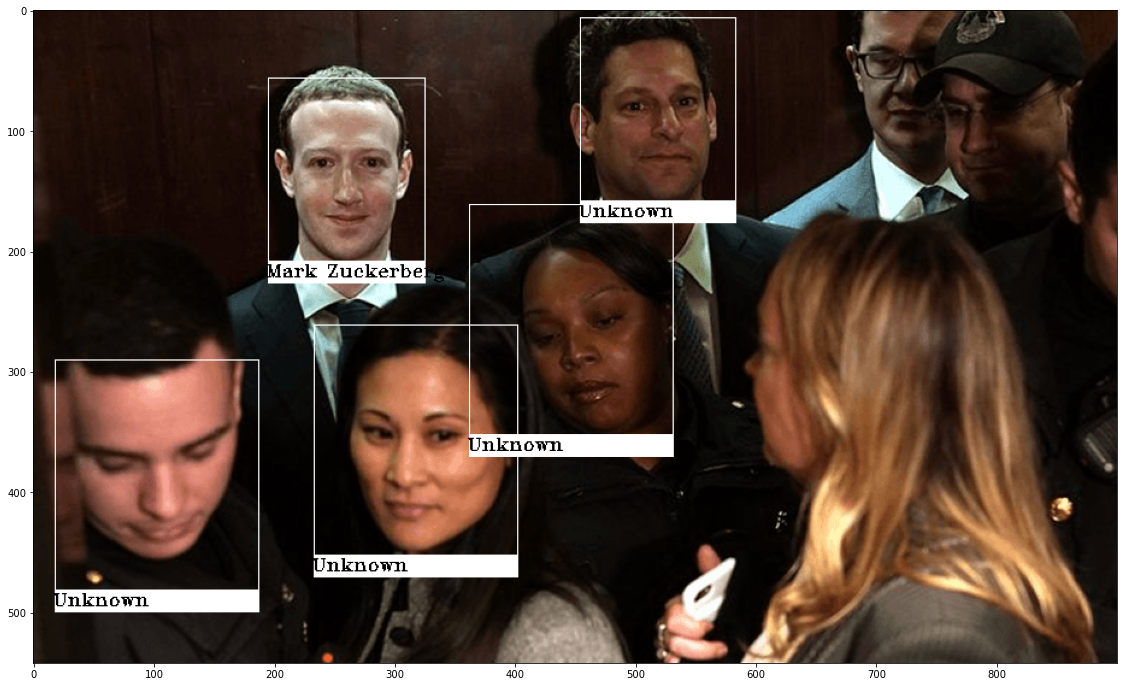

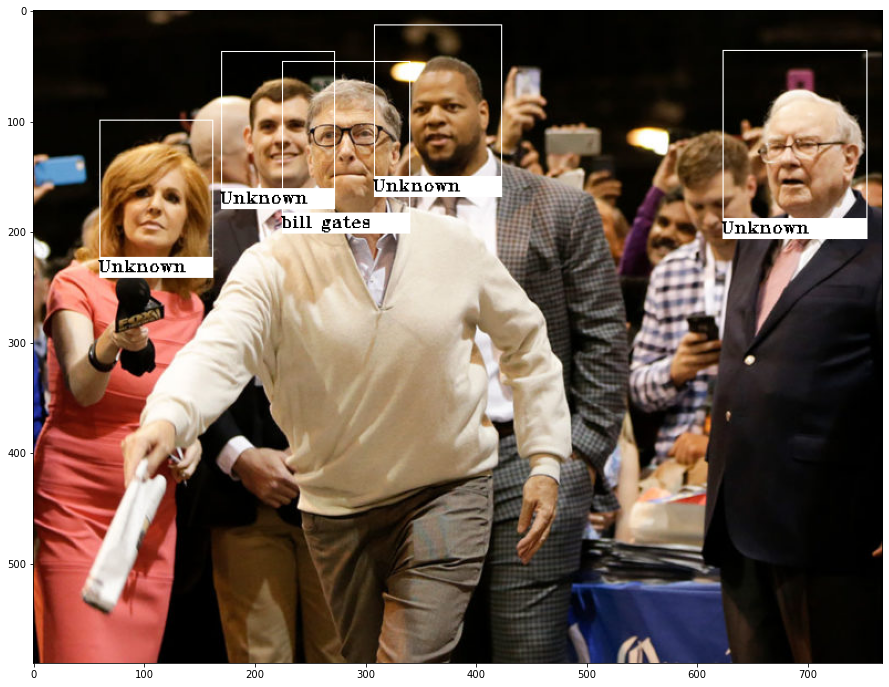

In [147]:
def get_encoded_faces():
    encoded = {}
    
    for dirpath, dnames, fnames in os.walk('./img'):
        for f in fnames:
            if f.endswith('.jpg') or f.endswith('.png'):
                face = fr.load_image_file('img/' + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split('.')[0]] = encoding
    return encoded

def unknown_image_encoded(img):
    face = fr.load_image_file('img/' + img)
    encoding = fr.face_encodings(face)[0]
    
    return encoding

def classify_face(im):
    faces = get_encoded_faces()
    faces_encoded  = list(faces.values())
    known_face_names = list(faces.keys())
    
    img = cv2.imread(im)
    
    face_locations = face_recognition.face_locations(img)
    unknown_face_encodings = face_recognition.face_encodings(img, face_locations)
    
    face_names = []
    for face_encoding in unknown_face_encodings:
        matches = face_recognition.compare_faces(faces_encoded, face_encoding)
        name = 'Unknown'
        
        face_distances = face_recognition.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            
        face_names.append(name)
        
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            #params
            color = [255, 255, 255]
            thickness = 1
            
            #bounding box
            cv2.rectangle(img, (left - 20, top - 50),(right + 20, bottom + 30 ), color, thickness)
            
            #filled rectangle = bottom +20
            cv2.rectangle(img, (left-20, bottom + 12), (right+20, bottom + 30), color, cv2.FILLED)
            font = cv2.FONT_HERSHEY_TRIPLEX
            cv2.putText(img, name, (left-22, bottom + 25), font,0.5, (0,0,0), 1)
        
    while True:
        plt.figure(figsize = (30,12))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        return f'Faces found: {len(face_names)}'
        
print(classify_face('mark_test.png'))
print(classify_face('bill_test.jpg'))